# Python for Machine Learning

### *Session \#4*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Naive Bayes

### Warm Ups

*Type the given code into the cell below*

---

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError
from yellowbrick.target import ClassBalance


from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

df = pd.read_csv("spam.csv", encoding = 'latin-1')

**Vectorize the words:** 
```
preprocess = CountVectorizer(stop_words='english', max_df=8, ngram_range=(1,3))
```

In [105]:
preprocess = CountVectorizer(stop_words='english', min_df=1, ngram_range=(1,3))

preprocess.fit(df['text'])

preprocess.get_feature_names()

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='\\b[^\\d\\W]+\\b',
                tokenizer=None, vocabulary=None)

**Set up pipeline and model:** 
```
model = make_pipeline(preprocess, MultinomialNB())
```

In [106]:
model = make_pipeline(preprocess, MultinomialNB())

**Fit and score model:** 
```
model.fit(df['text'], df['category'])
model.score(df['text'], df['category'])
```

In [107]:
model.fit(df['text'], df['category'])
model.score(df['text'], df['category'])

0.990667623833453

**Use model on a sentence:** `model.predict(["you're our instant winner!"])`

### Exercises
---

**1. Divide the spam dataset into** `X_train, X_test, y_train, y_test`

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'])

**2. Create a pipeline with a CountVectorizer and a MultinomialNB model**

In [99]:
model = make_pipeline(CountVectorizer(token_pattern=r'\b[^\d\W]+\b'),MultinomialNB())

0.9820531227566404

**3. Fit the model to the spam dataset. What is the accuracy of the model?**

In [35]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9921033740129217

**4. What is the class balance between spam and non-spam?**

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c21a63a90>,
             colormap=None, colors=None, labels=None)

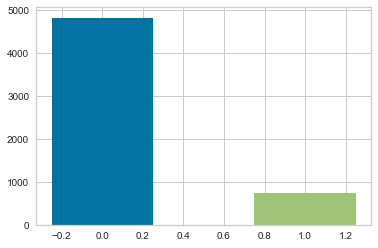

In [38]:
viz = ClassBalance()
viz.fit(df['category'])

**5. Retrain your model using balanced data, utilizing** `RandomOverSampler()`

0.9763101220387652

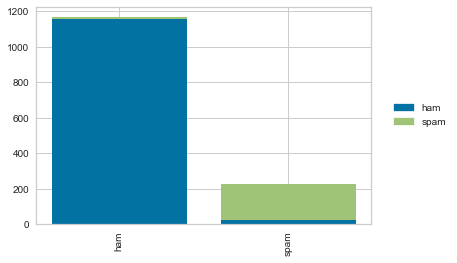

In [48]:
model = make_pipeline(CountVectorizer(stop_words='english', ngram_range=(1,3)),
                      RandomOverSampler(),
                      ClassPredictionError(MultinomialNB(alpha)))

model.fit(X_train, y_train)
model.score(X_test, y_test)

## II. Multi-class Classification

### Warm Ups

*Type the given code into the cell below*

---

In [109]:
df = pd.read_csv("tweets.csv")

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655
5,katyperry,happy 96th gma #fourmoreyears! 🎈 @ LACMA Los A...,NaN,09/01/2017 01:00,8.182610e+17,en,NaN,NaN,8242,2164
6,katyperry,"Kyoto, Japan \n1. 5. 17. https://t.co/o28M0vw9lR",NaN,06/01/2017 03:57,8.172180e+17,tl,NaN,NaN,7171,1910
7,katyperry,🇯🇵 @ Sanrio Puroland https://t.co/eXVev5UMBx,NaN,02/01/2017 09:31,8.158530e+17,cy,NaN,NaN,7766,2468
8,katyperry,2017 resolution: to embody authenticity!,NaN,01/01/2017 03:31,8.154000e+17,en,NaN,NaN,23662,8430
9,katyperry,sisters. https://t.co/5ZE21x2aNk,NaN,27/12/2016 04:04,8.135960e+17,en,NaN,NaN,9324,2637


### Exercises
---

**1. Train a Naive Bayes classifier on all the Twitter data. What is the accuracy of the model?**

0.6597137637028014

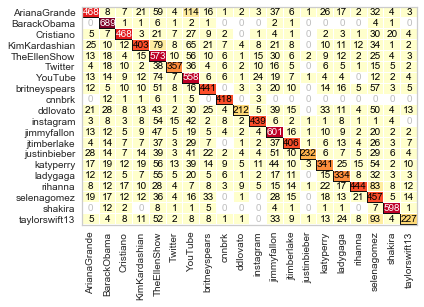

In [113]:
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['author'])

model = make_pipeline(CountVectorizer(stop_words='english'), 
                      MultinomialNB())

model.fit(X_train, y_train)
model.score(X_test, y_test)

**2. Use a** `ClassPredictionError` **plot to determine which celebrities are commonly mistaken for each other**


In [ ]:
model = make_pipeline(CountVectorizer(stop_words='english'), 
                      ClassPredictionError(MultinomialNB()))

model.fit(X_train, y_train)
model.score(X_test, y_test)

**3. Plot a** `ConfusionMatrix` **of your model. Which celebrity is hardest to classify?**         

In [ ]:
model = make_pipeline(CountVectorizer(stop_words='english'), 
                      ConfusionMatrix(MultinomialNB()))

model.fit(X_train, y_train)
model.score(X_test, y_test)

**4. Change the hyperparameters of your Naive Bayes model to improve performance**

In [133]:
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['author'])

model = make_pipeline(preprocess, 
                      MultinomialNB(alpha=0.25))

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6882612667478685

In [164]:
from random import choices

model.get_feature_names
words = choices(preprocess.get_feature_names(),
                weights=model.named_steps.multinomialnb.feature_count_[1],
                k=4)

" ".join(words)

'to the hint merry'